In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
BC = pd.read_csv('Breast-Cancer.csv')
BC.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
BC.shape

(116, 10)

In [4]:
BC['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

## 1. Ekplorasi

In [5]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [7]:
BC.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

<AxesSubplot: >

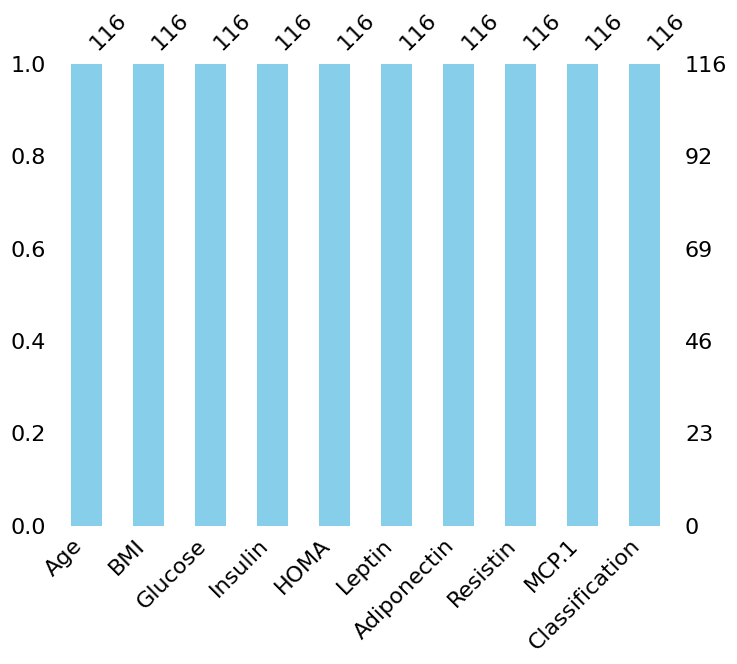

In [8]:
import missingno as msno
msno.bar(BC, figsize=(8,6),color='skyblue')

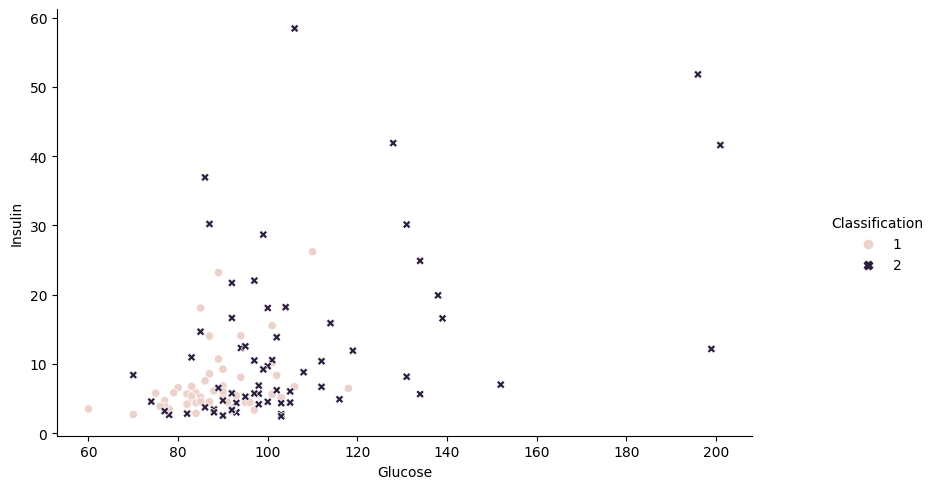

In [9]:
g=sns.relplot(x='Glucose', y='Insulin', data=BC, hue='Classification', style='Classification')
g.fig.set_size_inches(10,5)

In [10]:
BC.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


<AxesSubplot: >

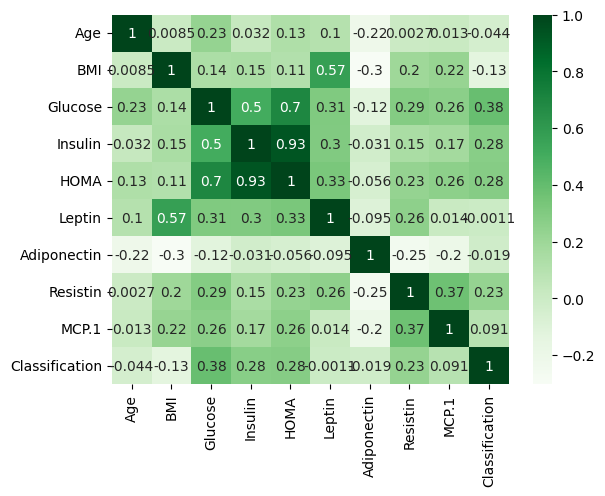

In [11]:
sns.heatmap(BC.corr(), annot=True, cmap='Greens')

In [12]:
X = BC.drop('Classification', axis=1)
y = BC['Classification']

In [13]:
#Spliting data menjadi train data dan test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y ,test_size =0.3, random_state=200)

print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (81, 9)
The shape of X_test is: (35, 9)
The shape of y_train is: (81,)
The shape of y_test is: (35,)


In [14]:
# Model Training
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
# Prediksi pada data train
pred_train = model.predict(X_train)

cm = confusion_matrix(y_train, pred_train)

#confusion matrix
print(f'Confusion_matrix Naive Bayes\n {cm}')
print('')

#Akurasi
print(f'Akurasi pada saat training: {accuracy_score(y_train, pred_train)}')# confusion matrix

Confusion_matrix Naive Bayes
 [[34  2]
 [24 21]]

Akurasi pada saat training: 0.6790123456790124


In [16]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           1       0.59      0.94      0.72        36
           2       0.91      0.47      0.62        45

    accuracy                           0.68        81
   macro avg       0.75      0.71      0.67        81
weighted avg       0.77      0.68      0.66        81



In [17]:
#Prediksi pada data test
pred_test = model.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average='micro')
recall = recall_score(y_test, pred_test, average='micro')
f1 = f1_score(y_test, pred_test, average='micro')

print(f'Confusion_matrix Naive Bayes\n {cm}')
print('')
print(f'Akurasi pada data test: {accuracy}')
print(f'Precision: {precision}')
print(f'recall: {recall}')
print(f'f1-score: {f1}')

Confusion_matrix Naive Bayes
 [[14  2]
 [14  5]]

Akurasi pada data test: 0.5428571428571428
Precision: 0.5428571428571428
recall: 0.5428571428571428
f1-score: 0.5428571428571428


In [19]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.50      0.88      0.64        16
           2       0.71      0.26      0.38        19

    accuracy                           0.54        35
   macro avg       0.61      0.57      0.51        35
weighted avg       0.62      0.54      0.50        35

